## Q1


Consider the linear regression model with likelihood
$$
p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\mathbf{X}) \propto \exp\!\left(-\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})\right),
$$
and the prior
$$
\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_\beta)
\quad \Longrightarrow \quad
p(\boldsymbol{\beta}) \propto \exp\!\left(-\frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)\right).
$$

Multiplying likelihood and prior gives the posterior (up to proportionality)
$$
p(\boldsymbol{\beta}|\mathbf{y},\mathbf{X},\sigma^2) \propto \exp\!\Biggl[-\frac{1}{2\sigma^2}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta}) - \frac{1}{2} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta}-\boldsymbol{\beta}_0)\Biggr].
$$

Expanding the quadratic form from the likelihood,
$$
(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})
= \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\boldsymbol{\beta} + \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X}\boldsymbol{\beta},
$$
and grouping the $\boldsymbol{\beta}$-dependent terms (ignoring constants), we have
$$
-\frac{1}{2}\left[\boldsymbol{\beta}^\top\!\left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1}\right)\!\boldsymbol{\beta} - 2\boldsymbol{\beta}^\top\!\left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1}\boldsymbol{\beta}_0\right)\right].
$$

Completing the square, we identify the posterior as a multivariate normal with
$$
\boldsymbol{\Sigma}_{\beta|y}^{-1} = \frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1},
$$
and mean
$$
\boldsymbol{\mu}_\beta = \boldsymbol{\Sigma}_{\beta|y}\left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{y} + \boldsymbol{\Sigma}_\beta^{-1}\boldsymbol{\beta}_0\right).
$$

Thus, the posterior for $\boldsymbol{\beta}$ is
$$
\boxed{
\boldsymbol{\beta}|\mathbf{y},\mathbf{X},\sigma^2 \sim \mathcal{N}\Bigl(\boldsymbol{\mu}_\beta,\boldsymbol{\Sigma}_{\beta|y}\Bigr)
}
$$
with
$$
\boldsymbol{\Sigma}_{\beta|y} = \left(\frac{1}{\sigma^2}\mathbf{X}^\top\mathbf{X} + \boldsymbol{\Sigma}_\beta^{-1}\right)^{-1}.
$$

## Posterior for $\sigma^2$

For the error variance, assume that, given $\boldsymbol{\beta}$, the likelihood is
$$
p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\mathbf{X}) \propto (\sigma^2)^{-n/2} \exp\!\left(-\frac{1}{2\sigma^2} (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})\right),
$$
and that the prior is
$$
\sigma^2 \sim \text{Inv-Gamma}(\alpha^*,\beta^*)
\quad \Longrightarrow \quad
p(\sigma^2) \propto (\sigma^2)^{-\alpha^*-1}\exp\!\left(-\frac{\beta^*}{\sigma^2}\right).
$$

Multiplying these we obtain
$$
p(\sigma^2|\mathbf{y},\mathbf{X},\boldsymbol{\beta}) \propto (\sigma^2)^{-n/2-\alpha^*-1}\exp\!\left(-\frac{1}{\sigma^2}\Bigl[\frac{1}{2}S + \beta^*\Bigr]\right),
$$
where
$$
S = (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y}-\mathbf{X}\boldsymbol{\beta}).
$$

Recognizing the kernel of an inverse-gamma distribution, we conclude that
$$
\boxed{
\sigma^2|\mathbf{y},\mathbf{X},\boldsymbol{\beta} \sim \text{Inv-Gamma}\!\left(\alpha^*+\frac{n}{2},\, \beta^*+\frac{1}{2}S\right).
}
$$


## Q2
https://www.kaggle.com/datasets/rajmohnani12/huntington-disease-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

df = pd.read_csv('./Huntington_Disease_Dataset.csv')
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Patient_ID', 'Age', 'Sex', 'Family_History', 'HTT_CAG_Repeat_Length', 'Motor_Symptoms', 'Cognitive_Decline', 'Chorea_Score', 'Brain_Volume_Loss', 'Functional_Capacity', 'Gene_Mutation_Type', 'HTT_Gene_Expression_Level', 'Protein_Aggregation_Level', 'Random_Protein_Sequence', 'Random_Gene_Sequence', 'Disease_Stage', 'Gene/Factor', 'Chromosome_Location', 'Function', 'Effect', 'Category']


In [2]:
predictor_col = 'HTT_CAG_Repeat_Length'
target_col = 'Functional_Capacity'
X = df[[predictor_col]].copy()
X.insert(0, 'Intercept', 1)
y = df[target_col].values
X = X.values
n, p = X.shape
print(n,p)

48536 2


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


           mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]  37.77  0.51   36.75    38.70       0.01     0.01   2359.51   
betas[1]   0.21  0.01    0.19     0.22       0.00     0.00   2370.94   
sigma     29.34  0.10   29.16    29.53       0.00     0.00   3175.16   

          ess_tail  r_hat  
betas[0]   3074.51    1.0  
betas[1]   3264.59    1.0  
sigma      3052.39    1.0  


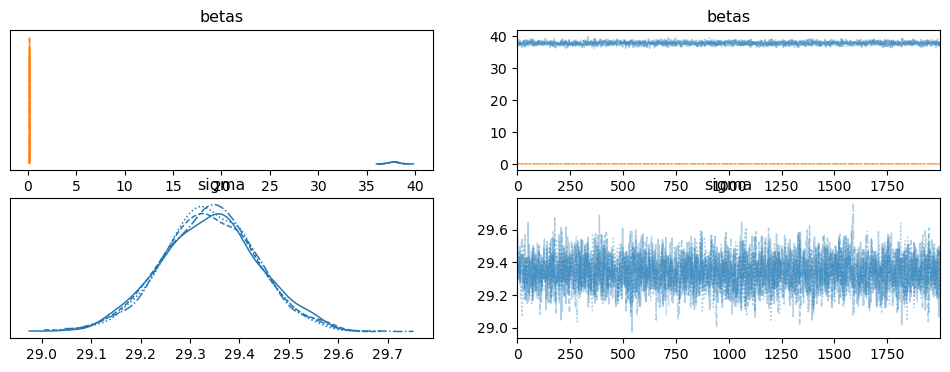

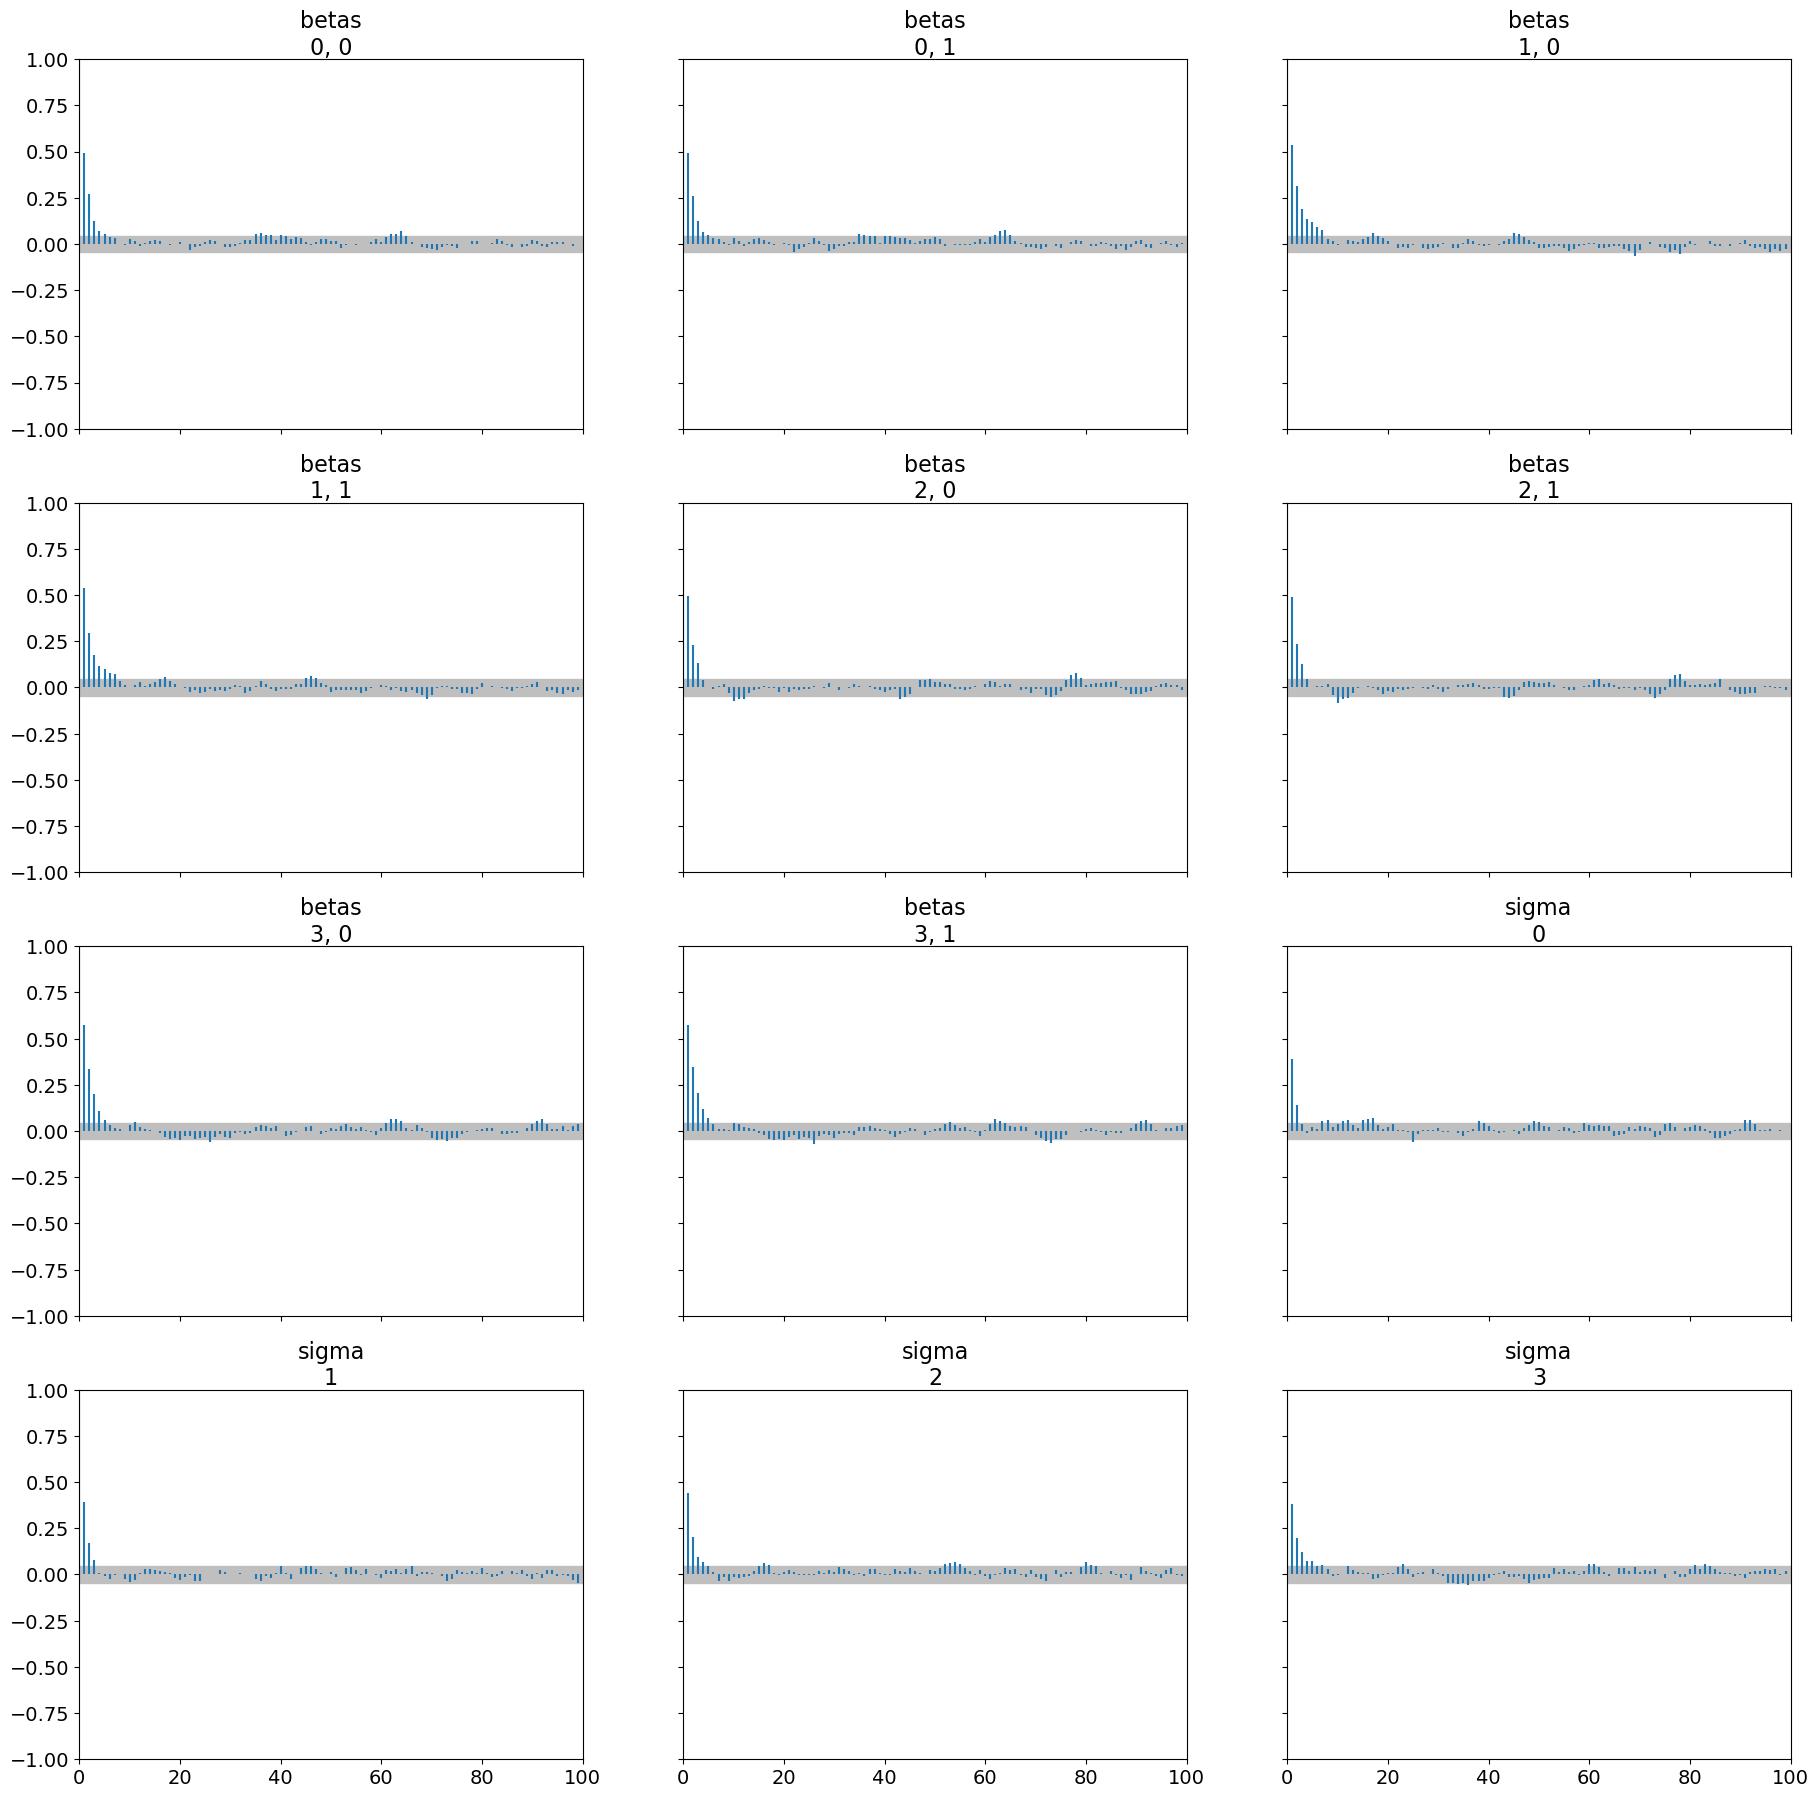

In [3]:
with pm.Model() as model:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.HalfCauchy('sigma', beta=1)
    mu = pm.math.dot(X,betas)
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)
print(az.summary(trace, round_to=2))
az.plot_trace(trace)
plt.show()
az.plot_autocorr(trace)
plt.show()

## Q3

In [4]:
cols = [predictor_col, target_col]
print("Summary Statistics:")
print(df[cols].describe())

Summary Statistics:
       HTT_CAG_Repeat_Length  Functional_Capacity
count           48536.000000         48536.000000
mean               57.516606            50.354829
std                13.264153            29.189697
min                35.000000             0.000000
25%                46.000000            25.000000
50%                58.000000            50.000000
75%                69.000000            76.000000
max                80.000000           100.000000


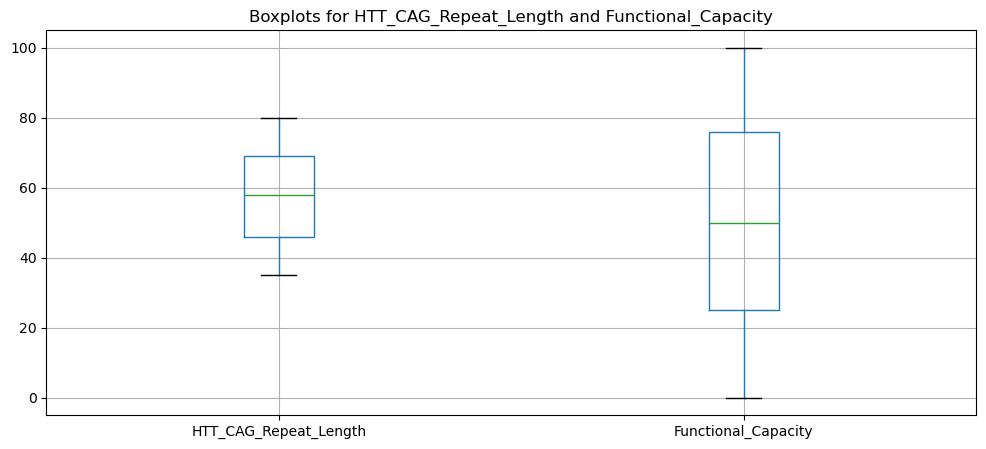

In [5]:
plt.figure(figsize=(12, 5))
df.boxplot(column=cols)
plt.title("Boxplots for HTT_CAG_Repeat_Length and Functional_Capacity")
plt.show()

In [6]:
def outlier_stats(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    perc_outliers = (len(outliers) / len(series)) * 100
    return lower_bound, upper_bound, len(outliers), perc_outliers

for col in cols:
    lb, ub, count, perc = outlier_stats(df[col])
    print(f"\nColumn: {col}")
    print(f"  Lower Bound: {lb}")
    print(f"  Upper Bound: {ub}")
    print(f"  Outliers Count: {count}")
    print(f"  Percent of Outliers: {perc:.2f}%")


Column: HTT_CAG_Repeat_Length
  Lower Bound: 11.5
  Upper Bound: 103.5
  Outliers Count: 0
  Percent of Outliers: 0.00%

Column: Functional_Capacity
  Lower Bound: -51.5
  Upper Bound: 152.5
  Outliers Count: 0
  Percent of Outliers: 0.00%


In [7]:
np.random.seed(42)
high_outlier_indices = df.sample(n=5, random_state=42).index
low_outlier_indices = df.sample(n=5, random_state=24).index
df.loc[low_outlier_indices, target_col] -= 50
df.loc[high_outlier_indices, target_col] += 50
X = df[[predictor_col]].copy()
X.insert(0, 'Intercept', 1)
y = df[target_col].values
X = X.values
n, p = X.shape
lb, ub, count, perc = outlier_stats(df[target_col])
print(f"\nColumn: {target_col}")
print(f"  Lower Bound: {lb}")
print(f"  Upper Bound: {ub}")
print(f"  Outliers Count: {count}")
print(f"  Percent of Outliers: {perc:.2f}%")


Column: Functional_Capacity
  Lower Bound: -51.5
  Upper Bound: 152.5
  Outliers Count: 0
  Percent of Outliers: 0.00%


In [ ]:
with pm.Model() as robust_model:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    
    tau = pm.Gamma('tau', alpha=1, beta=1)
    
    # nu = pm.Exponential('nu_minus2', lam=1/30) + 2
    nu_minus2 = pm.Normal('nu_minus2', mu=0, sigma=5)
    nu = pm.Deterministic('nu', nu_minus2 + 2)
    tau_i = pm.Gamma('tau_i', alpha=nu/2, beta=nu/2, shape=n, initval=np.ones(n))
    sigma_i = 1 / pm.math.sqrt(tau * tau_i)
    
    mu = pm.math.dot(X, betas)
    y_obs = pm.Normal('y', mu=mu, sigma=sigma_i, observed=y)

    robust_trace = pm.sample(2000, tune=1000, target_accept=0.99, init="adapt_diag", return_inferencedata=True)
print(az.summary(robust_trace, round_to=2))
az.plot_trace(robust_trace)
plt.show()
az.plot_autocorr(robust_trace)
plt.show()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, tau, nu_minus2, tau_i]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 830 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


               mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]      37.61  0.52   36.61    38.56       0.01     0.01   5042.02   
betas[1]       0.21  0.01    0.19     0.23       0.00     0.00   5034.57   
nu_minus2     70.19  3.06   64.61    75.97       0.34     0.24     82.07   
tau            0.00  0.00    0.00     0.00       0.00     0.00   8707.09   
tau_i[0]       0.98  0.17    0.67     1.29       0.00     0.00  12043.32   
...             ...   ...     ...      ...        ...      ...       ...   
tau_i[48532]   1.00  0.17    0.70     1.31       0.00     0.00  11648.79   
tau_i[48533]   1.01  0.16    0.70     1.32       0.00     0.00  10104.19   
tau_i[48534]   0.99  0.16    0.69     1.30       0.00     0.00  12656.08   
tau_i[48535]   1.01  0.17    0.71     1.34       0.00     0.00  12675.37   
nu            72.19  3.06   66.61    77.97       0.34     0.24     82.07   

              ess_tail  r_hat  
betas[0]       5500.61   1.00  
betas[1]       5547.44 

In [ ]:
tau_i_samples = robust_trace.posterior['tau_i'].stack(draws=("chain", "draw")).values
tau_i_means = tau_i_samples.mean(axis=1)

print("\nPosterior mean of τᵢ for each observation:")
for i, val in enumerate(tau_i_means):
    print(f"Observation {i}: {val:.3f}")
outlier_idx = np.argmin(tau_i_means)
non_outlier_idx = np.argmin(np.abs(tau_i_means - 1))

print(f"\nOutlier candidate observation index: {outlier_idx} with mean τᵢ = {tau_i_means[outlier_idx]:.3f}")
print(f"Non-outlier candidate observation index: {non_outlier_idx} with mean τᵢ = {tau_i_means[non_outlier_idx]:.3f}")


In [ ]:
tau_samples = robust_trace.posterior['tau'].stack(draws=("chain", "draw")).values
num_draws = tau_samples.shape[0]

h_outlier = []
h_non_outlier = []

for d in range(num_draws):
    w = tau_samples[d] * tau_i_samples[:, d]  # shape (n,)
    W = np.diag(w)
    XWX = X.T @ W @ X
    XWX_inv = np.linalg.inv(XWX)
    
    x_i = X[outlier_idx, :].reshape(-1, 1)
    h_val = w[outlier_idx] * (x_i.T @ XWX_inv @ x_i)
    h_outlier.append(h_val.item())
    
    x_i = X[non_outlier_idx, :].reshape(-1, 1)
    h_val = w[non_outlier_idx] * (x_i.T @ XWX_inv @ x_i)
    h_non_outlier.append(h_val.item())

h_outlier = np.array(h_outlier)
h_non_outlier = np.array(h_non_outlier)

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(h_outlier, bins=30, alpha=0.7, label='Outlier Candidate')
plt.hist(h_non_outlier, bins=30, alpha=0.7, label='Non-Outlier Candidate')
plt.xlabel('Influence (Hat Value)')
plt.ylabel('Frequency')
plt.title('Posterior Distributions of Influence for Selected Observations')
plt.legend()
plt.show()

print("\nOutlier Candidate Influence:")
print("Mean:", h_outlier.mean(), "SD:", h_outlier.std())
print("Non-Outlier Candidate Influence:")
print("Mean:", h_non_outlier.mean(), "SD:", h_non_outlier.std())